## Accessing the Stock Price Data

In [1]:
!pip install pandas-datareader

In [34]:
!pip install yfinance

  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.7.1
    Uninstalling lxml-4.7.1:
      Successfully uninstalled lxml-4.7.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [197]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import pandas as pd

In [198]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [199]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2022,12,31)

In [200]:
# fucntion that gets the stock data
def get_stock(ticker):
    yf.pdr_override()
    data = pdr.get_data_yahoo(f"{ticker}",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    data.reset_index(inplace=True)
    data.index = data.index.astype(int)
    return data 

In [201]:
# pfizer = get_stock("PFE")
# jnj = get_stock("JNJ")

## Stocks to be pulled are:
#### Healthcare : Moderna (MRNA), Pfizer (PFE), Johnson & Johnson (JNJ)
#### Tech : Google (GOOGL), Facebook/META (META), Apple (AAPL)
#### Retail : Costco (COST), Walmart (WMT), Kroger Co (KR)
#### Finance : JPMorgan Chase & Co (JPM), Bank of America (BAC), HSBC Holding (HSBC)

In [202]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged

In [203]:
stocks = ["MRNA", "PFE", "JNJ", "GOOGL", 
          "META", "AAPL", "COST", "WMT", "KR", "JPM", 
          "BAC", "HSBC"]
portfolio = combine_stocks(stocks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       MRNA        PFE         JNJ      GOOGL        META  \
0 2019-01-02  15.330000  41.034157  127.750000  52.734001  135.679993   
1 2019-01-03  15.500000  3

In [204]:
portfolio.to_csv("portfolio.csv", index=False)

In [205]:
portfolio = pd.read_csv("portfolio.csv", parse_dates=['Date'])

# Mean Variance Optimization

In [63]:
!pip install PyPortfolioOpt

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.0.4
    Uninstalling setuptools-58.0.4:
      Successfully uninstalled setuptools-58.0.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.4.0 requires daal==2021.3.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
tensorflow 2.3.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.6.2 which is incompatible.
tensorflow 2.3.0 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.6.0 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.
astropy 4.3.pos

In [206]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [207]:
from pypfopt import plotting

In [208]:
# portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'APPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']] = portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']].astype(float)

In [209]:
mu = mean_historical_return(portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']])
S = CovarianceShrinkage(portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']]).ledoit_wolf()

In [210]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))
print("-----------------------------------")
ef.portfolio_performance(verbose=True)

{'MRNA': 0.25786, 'PFE': 0.0, 'JNJ': 0.0, 'GOOGL': 0.0, 'META': 0.0, 'AAPL': 0.41782, 'COST': 0.25427, 'WMT': 0.0, 'KR': 0.07006, 'JPM': 0.0, 'BAC': 0.0, 'HSBC': 0.0}
-----------------------------------
Expected annual return: 43.0%
Annual volatility: 30.7%
Sharpe Ratio: 1.34


(0.4302485476813618, 0.30677106892250045, 1.3373117260448144)

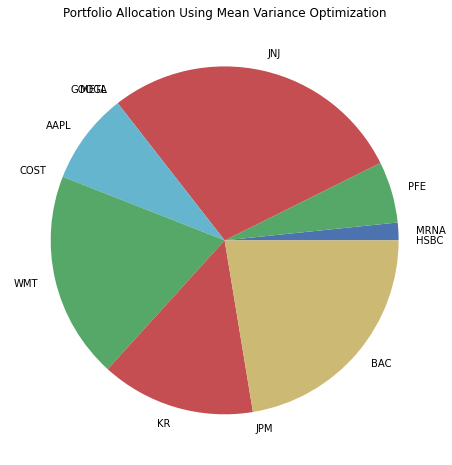

In [225]:
# plotting.plot_weights(weights, title="Portfolio Allocation")

weights_dict = dict(cleaned_weights)

# Create a figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
ax.pie(weights_dict.values(), labels=weights_dict.keys())

# Set the title of the chart
ax.set_title('Portfolio Allocation Using Mean Variance Optimization')

# Display the chart
plt.show()

#### Considering the investment amount as $100,000

In [212]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio).dropna()
latest_prices = pd.to_numeric(latest_prices, errors='coerce')
latest_prices = latest_prices.iloc[1:]  # drop the first row
# print(latest_prices)
amount = 100000
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=amount)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL': 321, 'MRNA': 143, 'COST': 56, 'KR': 157}
Funds remaining: $43.75


## Conclusion For Mean Variance Optimization

We see that our portfolio performs with an expected annual return of 43 percent. The Sharpe ratio value of 1.34 indicates that the portfolio optimization algorithm performs well with our current data. Of course, this return is inflated and is not likely to hold up in the future. 

Mean variance optimization doesn’t perform very well since it makes many simplifying assumptions, such as returns being normally distributed and the need for an invertible covariance matrix. Fortunately, methods like HRP and mCVAR address these limitations. 

# Hierarchical Risk Parity (HRP)

In [213]:
from pypfopt import HRPOpt

In [214]:
returns = portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'APPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']] = portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'AAPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']].pct_change().dropna()

In [216]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()

In [217]:
print(dict(hrp_weights))
print("-----------------------------------")
hrp.portfolio_performance(verbose=True)

{'AAPL': 0.07578508276058257, 'BAC': 0.061285362879451764, 'COST': 0.09043492065023764, 'GOOGL': 0.051059553492855965, 'HSBC': 0.059511423787638025, 'JNJ': 0.2146142053950624, 'JPM': 0.04755542704459071, 'KR': 0.11038355390831939, 'META': 0.026764887036446836, 'MRNA': 0.019619010874009676, 'PFE': 0.1420019409662181, 'WMT': 0.1009846312045869}
-----------------------------------
Expected annual return: 15.9%
Annual volatility: 18.5%
Sharpe Ratio: 0.75


(0.15888304757454455, 0.1846398191886778, 0.7521836198974188)

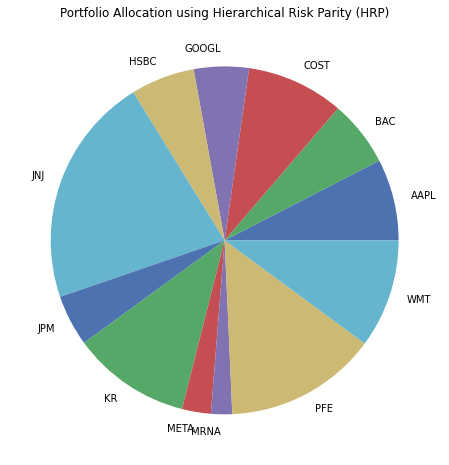

In [226]:
# plotting.plot_weights(hrp_weights, title="Portfolio Allocation")

weights_dict = dict(hrp_weights)

# Create a figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
ax.pie(weights_dict.values(), labels=weights_dict.keys())

# Set the title of the chart
ax.set_title('Portfolio Allocation using Hierarchical Risk Parity (HRP)')

# Display the chart
plt.show()

In [219]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'JNJ': 121, 'PFE': 277, 'KR': 247, 'WMT': 71, 'COST': 20, 'AAPL': 58, 'BAC': 185, 'HSBC': 191, 'GOOGL': 58, 'JPM': 36, 'META': 22, 'MRNA': 11}
Funds remaining (HRP): $40.58


# Conclusion Hierarchical Risk Parity (HRP)

We see that we have an expected annual return of 15.9 percent, which is significantly less than the inflated 43.0 percent we achieved with mean variance optimization. We also see a diminished Sharpe ratio of 0.75.  This result is much more reasonable and more likely to hold up in the future since HRP is not as sensitive to outliers as mean variance optimization is. 

We see that our algorithm suggests we invest heavily into Kroger (KR), HSBC, Johnson & Johnson (JNJ) and Pfizer (PFE) and not, as the previous model did, so much into Moderna (MRNA) and Apple (AAPL). Further, while the performance decreased, we can be more confident that this model will perform just as well when we refresh our data. This is because HRP is more robust to the anomalous increase in Moderna and Apple stock prices.

# Mean Conditional Value at Risk (mCVAR)

In [220]:
from pypfopt.efficient_frontier import EfficientCVaR

In [221]:
S = portfolio[['MRNA', 'PFE', 'JNJ', 'GOOGL', 'META', 'APPL', 'COST', 'WMT', 'KR', 'JPM', 'BAC', 'HSBC']].cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cvar_weights))
print("-----------------------------------")
ef_cvar.portfolio_performance(verbose=True)

{'MRNA': 0.0164112362579626, 'PFE': 0.0570599244725613, 'JNJ': 0.2818814967502368, 'GOOGL': 2.30506716e-08, 'META': 2.22640728e-08, 'AAPL': 0.0851246432923121, 'COST': 3.86006137e-08, 'WMT': 0.1922373482936009, 'KR': 0.1432909752939262, 'JPM': 4.07974923e-08, 'BAC': 0.2239942403932198, 'HSBC': 1.05333297e-08}
-----------------------------------
Expected annual return: 12.7%
Conditional Value at Risk: -0.01%


(0.12695234386727605, -0.00012160499953229924)

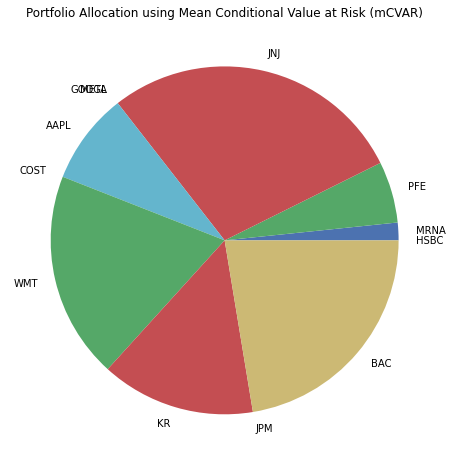

In [227]:
# plotting.plot_weights(cleaned_weights, title="Portfolio Allocation")

weights_dict = dict(cleaned_weights)

# Create a figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
ax.pie(weights_dict.values(), labels=weights_dict.keys())

# Set the title of the chart
ax.set_title('Portfolio Allocation using Mean Conditional Value at Risk (mCVAR)')

# Display the chart
plt.show()

In [224]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'JNJ': 160, 'BAC': 676, 'WMT': 135, 'KR': 321, 'AAPL': 66, 'PFE': 111, 'MRNA': 9}
Funds remaining (CVAR): $15.45


# Conclusion Mean Conditional Value at Risk (mCVAR)

We see that this algorithm suggests we invest heavily into Johnson & Johnson (JNJ) and Bank of America (BAC). Also it suggests to buy a single share of HSBC. Also we see that the expected return is 12.7 percent.As with HRP, this result is much more reasonable than the inflated 43 percent returns given by mean variance optimization since it is not as sensitive to the anomalous behaviour of the Moderna stock price. 